In [1]:
import pandas as pd


# Specify the file path for the .xlsl file
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/4.New_CGM/Datas/0206_CGM.xlsx', engine='openpyxl')  # 파일 경로 지정


# Display the dataframe
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day
0,1,2022-10-06 01:34:00,78,1
1,1,2022-10-06 01:49:00,76,1
2,1,2022-10-06 02:04:00,78,1
3,1,2022-10-06 02:19:00,75,1
4,1,2022-10-06 02:34:00,75,1
...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13
71713,89,2023-05-09 19:23:00,136,13
71714,89,2023-05-09 19:38:00,142,13
71715,89,2023-05-09 19:53:00,137,13


# Compare with daily based mean & SD (1,2,3..13th each day)

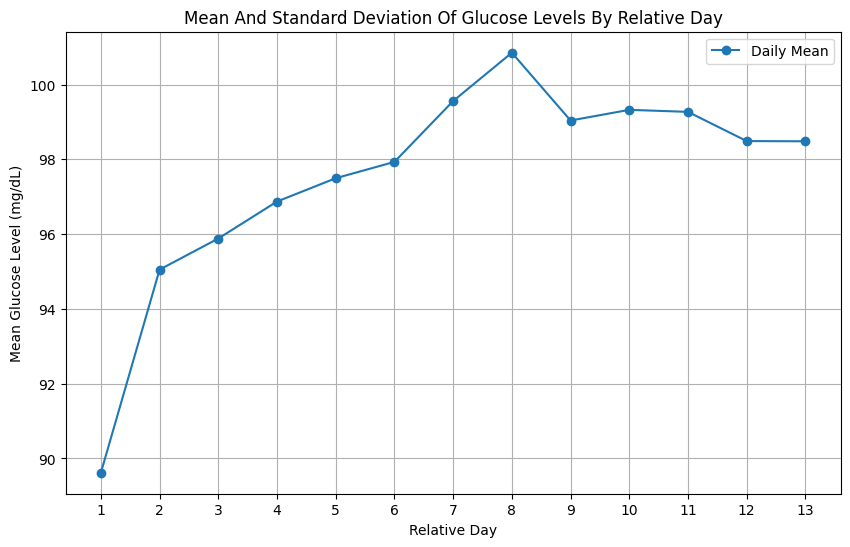

    Relative_Day        mean        std
0              1   89.618189  22.317600
1              2   95.049993  21.154133
2              3   95.881591  22.420274
3              4   96.870770  21.506610
4              5   97.494214  21.673808
5              6   97.931094  19.680347
6              7   99.558878  20.085300
7              8  100.850483  19.335322
8              9   99.037660  17.741069
9             10   99.322995  19.259551
10            11   99.268399  20.553342
11            12   98.487500  17.674103
12            13   98.481760  17.529491
The day with the smallest mean glucose level is 1.0 with a mean of 89.62 mg/dL.
The day with the largest mean glucose level is 8.0 with a mean of 100.85 mg/dL.
The difference between the highest and lowest mean glucose levels is 11.23 mg/dL.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names (remove spaces)
df.columns = df.columns.str.replace(' ', '_')

# Compute mean and standard deviation for each Relative_Day (using only that day's data)
daily_summary_stats = df.groupby('Relative_Day')['Glucose_mg/dL'].agg(['mean', 'std']).reset_index()

# Find the days with the smallest and largest mean glucose levels
min_day = daily_summary_stats.loc[daily_summary_stats['mean'].idxmin()]
max_day = daily_summary_stats.loc[daily_summary_stats['mean'].idxmax()]
mean_difference = max_day['mean'] - min_day['mean']

# Plot daily means
plt.figure(figsize=(10, 6))
plt.plot(daily_summary_stats['Relative_Day'], daily_summary_stats['mean'], marker='o', linestyle='-', label='Daily Mean')
plt.xlabel('Relative Day')
plt.ylabel('Mean Glucose Level (mg/dL)')
plt.title('Mean And Standard Deviation Of Glucose Levels By Relative Day')
plt.grid(True)
plt.xticks(daily_summary_stats['Relative_Day'])
plt.legend()
plt.show()

# Print the daily summary table
print(daily_summary_stats)

# Print the days with the smallest and largest mean glucose levels and their difference
print(f"The day with the smallest mean glucose level is {min_day['Relative_Day']} with a mean of {min_day['mean']:.2f} mg/dL.")
print(f"The day with the largest mean glucose level is {max_day['Relative_Day']} with a mean of {max_day['mean']:.2f} mg/dL.")
print(f"The difference between the highest and lowest mean glucose levels is {mean_difference:.2f} mg/dL.")


# Comparison of Cumulative Average Standard Deviation (1, 1-2, 1-3, ... 1-13)

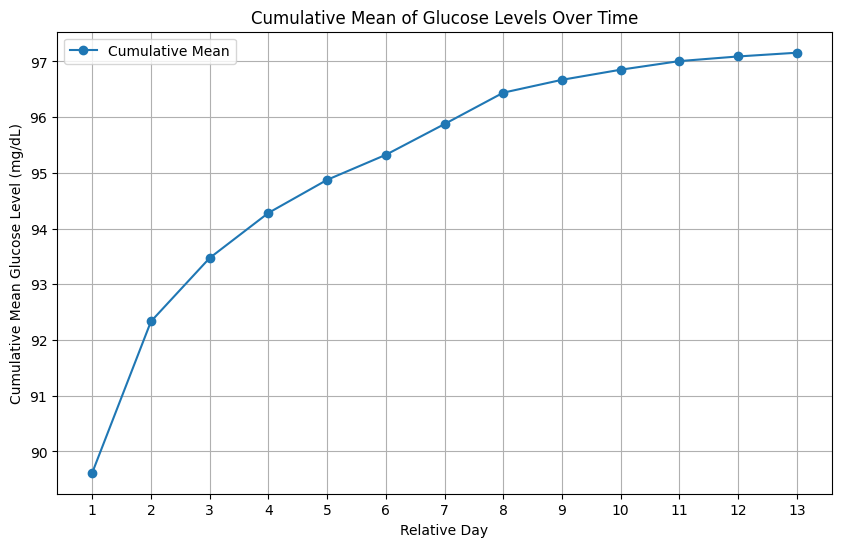

    Relative_Day  cumulative_mean
0              1        89.618189
1              2        92.333709
2              3        93.472464
3              4        94.281030
4              5        94.874788
5              6        95.324222
6              7        95.876374
7              8        96.439213
8              9        96.670108
9             10        96.851657
10            11        97.006100
11            12        97.089434
12            13        97.156490
The day with the smallest cumulative mean glucose level is 1.0 with a mean of 89.62 mg/dL.
The day with the largest cumulative mean glucose level is 13.0 with a mean of 97.16 mg/dL.
The difference between the highest and lowest cumulative mean glucose levels is 7.54 mg/dL.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Clean column names (remove spaces)
df.columns = df.columns.str.replace(' ', '_')

# Compute mean and standard deviation for each Relative_Day
summary_stats = df.groupby('Relative_Day')['Glucose_mg/dL'].agg(['mean', 'std']).reset_index()

# Compute cumulative means correctly (1-day, 1-2 days, 1-3 days, ..., 1-13 days)
cumulative_means = []
for day in range(1, 14):  # For days 1 to 13
    subset = df[df['Relative_Day'] <= day]
    cumulative_means.append({'Relative_Day': day, 'cumulative_mean': subset['Glucose_mg/dL'].mean()})

# Convert to DataFrame
cumulative_summary = pd.DataFrame(cumulative_means)

# Find the days with the smallest and largest mean glucose levels
min_day = cumulative_summary.loc[cumulative_summary['cumulative_mean'].idxmin()]
max_day = cumulative_summary.loc[cumulative_summary['cumulative_mean'].idxmax()]
mean_difference = max_day['cumulative_mean'] - min_day['cumulative_mean']

# Plot cumulative means
plt.figure(figsize=(10, 6))
plt.plot(cumulative_summary['Relative_Day'], cumulative_summary['cumulative_mean'], marker='o', linestyle='-', label='Cumulative Mean')
plt.xlabel('Relative Day')
plt.ylabel('Cumulative Mean Glucose Level (mg/dL)')
plt.title('Cumulative Mean of Glucose Levels Over Time')
plt.grid(True)
plt.xticks(cumulative_summary['Relative_Day'])
plt.legend()
plt.show()

# Print the cumulative summary table
print(cumulative_summary)

# Print the days with the smallest and largest cumulative mean glucose levels and their difference
print(f"The day with the smallest cumulative mean glucose level is {min_day['Relative_Day']} with a mean of {min_day['cumulative_mean']:.2f} mg/dL.")
print(f"The day with the largest cumulative mean glucose level is {max_day['Relative_Day']} with a mean of {max_day['cumulative_mean']:.2f} mg/dL.")
print(f"The difference between the highest and lowest cumulative mean glucose levels is {mean_difference:.2f} mg/dL.")


# Rolling look back period (2-7days look back)

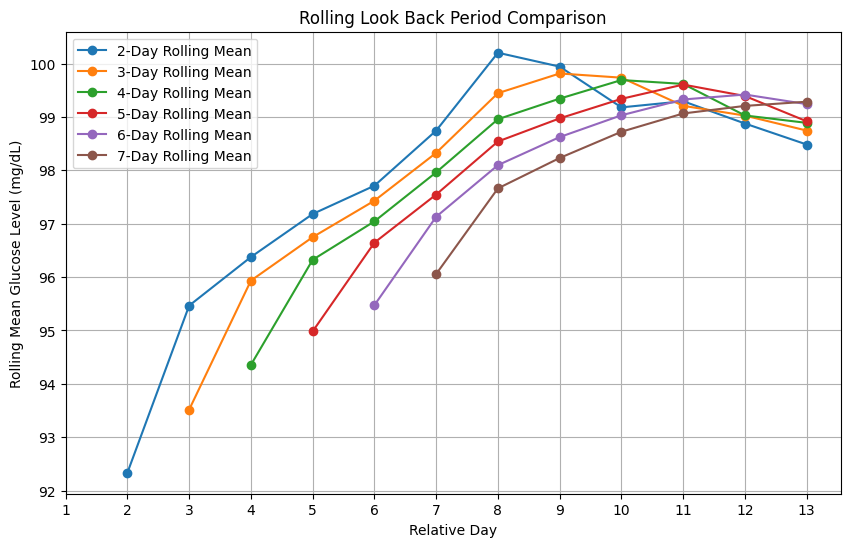

    Relative_Day           2          3          4          5          6  \
0              1         NaN        NaN        NaN        NaN        NaN   
1              2   92.334091        NaN        NaN        NaN        NaN   
2              3   95.465792  93.516591        NaN        NaN        NaN   
3              4   96.376180  95.934118  94.355136        NaN        NaN   
4              5   97.182492  96.748858  96.324142  94.982951        NaN   
5              6   97.712654  97.432026  97.044417  96.645532  95.474309   
6              7   98.744986  98.328062  97.963739  97.547309  97.131090   
7              8  100.204681  99.446818  98.958667  98.541088  98.097838   
8              9   99.944072  99.815674  99.344529  98.974466  98.623850   
9             10   99.180328  99.737046  99.692504  99.340222  99.032554   
10            11   99.295697  99.209685  99.619884  99.607683  99.328252   
11            12   98.877950  99.026298  99.029139  99.393408  99.420986   
12          

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Title: Rolling Look Back Period Analysis

# Clean column names (remove spaces)
df.columns = df.columns.str.replace(' ', '_')

# Compute mean and standard deviation for each Relative_Day (using only that day's data)
daily_summary_stats = df.groupby('Relative_Day')['Glucose_mg/dL'].agg(['mean', 'std']).reset_index()

# Define rolling look back periods
rolling_periods = [2, 3, 4, 5, 6, 7]
rolling_means = {}

# Compute rolling means for different periods
for period in rolling_periods:
    rolling_means[period] = daily_summary_stats['mean'].rolling(window=period).mean()

# Plot rolling look back periods
plt.figure(figsize=(10, 6))
for period, values in rolling_means.items():
    plt.plot(daily_summary_stats['Relative_Day'], values, marker='o', linestyle='-', label=f'{period}-Day Rolling Mean')

plt.xlabel('Relative Day')
plt.ylabel('Rolling Mean Glucose Level (mg/dL)')
plt.title('Rolling Look Back Period Comparison')
plt.grid(True)
plt.xticks(daily_summary_stats['Relative_Day'])
plt.legend()
plt.show()

# Print rolling mean tables
rolling_summary = pd.DataFrame(rolling_means)
rolling_summary.insert(0, 'Relative_Day', daily_summary_stats['Relative_Day'])
print(rolling_summary)


#Ex) 1-2, 2-3, 3-4, 4-5 (2day rolling look back)
# 1-3, 2-4, 3-5, 4-6 (3day rolling look back)
# 1-4, 2-5, 3-6, 4-7 (4day rolling look back)
# 1-5, 2-6, 3-7, 4-8 (5day rolling look back)


# Using rolling look back Mean&SD based on previous data

## (e.g., 3 day and 7day look back period)

### Calculate rolling means and standard deviations for both 3-day and 7-day windows.
### Detect GE exceedances on day 8 using a 1.5 SD threshold.
### Count GE exceedances, ensuring continuous values are counted as one occurrence.
### Randomly select 3 subjects from day 8 for visualization.


In [51]:
import pandas as pd


# Specify the file path for the .xlsl file
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/4.New_CGM/Datas/0206_CGM.xlsx', engine='openpyxl')  # 파일 경로 지정


# Display the dataframe
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day
0,1,2022-10-06 01:34:00,78,1
1,1,2022-10-06 01:49:00,76,1
2,1,2022-10-06 02:04:00,78,1
3,1,2022-10-06 02:19:00,75,1
4,1,2022-10-06 02:34:00,75,1
...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13
71713,89,2023-05-09 19:23:00,136,13
71714,89,2023-05-09 19:38:00,142,13
71715,89,2023-05-09 19:53:00,137,13


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71717 entries, 0 to 71716
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StudyID        71717 non-null  int64         
 1   Timestamp      71717 non-null  datetime64[ns]
 2   Glucose mg/dL  71717 non-null  int64         
 3   Relative_Day   71717 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.2 MB


In [53]:
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day
0,1,2022-10-06 01:34:00,78,1
1,1,2022-10-06 01:49:00,76,1
2,1,2022-10-06 02:04:00,78,1
3,1,2022-10-06 02:19:00,75,1
4,1,2022-10-06 02:34:00,75,1
...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13
71713,89,2023-05-09 19:23:00,136,13
71714,89,2023-05-09 19:38:00,142,13
71715,89,2023-05-09 19:53:00,137,13


In [55]:
import pandas as pd



# Define the rolling look-back periods
lookback_periods = [3, 7]

# Function to compute rolling statistics based on Relative_Day
def compute_rolling_stats(group, periods):
    """
    Computes rolling mean and standard deviation based on Relative_Day 
    while ensuring correct grouping within each StudyID.

    Parameters:
    group (DataFrame): Data grouped by StudyID.
    periods (list): List of look-back periods to calculate rolling statistics.

    Returns:
    DataFrame: Updated group with rolling mean and standard deviation.
    """
    for period in periods:
        # Remove duplicate Relative_Day values to prevent incorrect calculations
        unique_days = group[['Relative_Day', 'Glucose mg/dL']].drop_duplicates(subset=['Relative_Day'])

        # Apply rolling calculations based on Relative_Day
        unique_days[f'Rolling_{period}D_Mean'] = unique_days['Glucose mg/dL'].rolling(period, min_periods=period).mean()
        unique_days[f'Rolling_{period}D_Std'] = unique_days['Glucose mg/dL'].rolling(period, min_periods=period).std()

        # Merge rolling statistics back to the original dataset
        group = group.merge(unique_days[['Relative_Day', f'Rolling_{period}D_Mean', f'Rolling_{period}D_Std']], 
                            on='Relative_Day', how='left')

    return group

# Apply rolling calculations while sorting by StudyID and Relative_Day
df = df.sort_values(by=['StudyID', 'Relative_Day']).groupby('StudyID', group_keys=False).apply(
    lambda x: compute_rolling_stats(x, lookback_periods)
)

# Display first few rows to check the result
df


,StudyID,Timestamp,Glucose mg/dL,Relative_Day,Rolling_3D_Mean,Rolling_3D_Std,Rolling_7D_Mean,Rolling_7D_Std
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN
1,1,2022-10-06 01:49:00,76,1,NaN,NaN,NaN,NaN
2,1,2022-10-06 02:04:00,78,1,NaN,NaN,NaN,NaN
3,1,2022-10-06 02:19:00,75,1,NaN,NaN,NaN,NaN
4,1,2022-10-06 02:34:00,75,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1243,89,2023-05-09 19:08:00,114,13,98.666667,24.193663,95.571429,17.859238
1244,89,2023-05-09 19:23:00,136,13,98.666667,24.193663,95.571429,17.859238
1245,89,2023-05-09 19:38:00,142,13,98.666667,24.193663,95.571429,17.859238
1246,89,2023-05-09 19:53:00,137,13,98.666667,24.193663,95.571429,17.859238


In [57]:
# Save the processed data (optional)
df.to_excel("rolling_3_7.xlsx", index=False)

## Add Threshold columns

In [60]:
import pandas as pd


# Ensure correct column names by stripping any unwanted spaces
df.columns = df.columns.str.strip()

# Add new threshold columns based on rolling mean and standard deviation
df["3D_Threshold"] = df["Rolling_3D_Mean"] + (1.5 * df["Rolling_3D_Std"])
df["7D_Threshold"] = df["Rolling_7D_Mean"] + (1.5 * df["Rolling_7D_Std"])

# Reorder columns as requested
column_order = [
    "StudyID", "Timestamp", "Glucose mg/dL", "Relative_Day",
    "Rolling_3D_Mean", "Rolling_3D_Std", "3D_Threshold",
    "Rolling_7D_Mean", "Rolling_7D_Std", "7D_Threshold"
]

df = df[column_order]

df
# Save the updated dataset (optional)
df.to_excel("rolling37_thresholds.xlsx", index=False)


In [61]:
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day,Rolling_3D_Mean,Rolling_3D_Std,3D_Threshold,Rolling_7D_Mean,Rolling_7D_Std,7D_Threshold
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022-10-06 01:49:00,76,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2022-10-06 02:04:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2022-10-06 02:19:00,75,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2022-10-06 02:34:00,75,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1243,89,2023-05-09 19:08:00,114,13,98.666667,24.193663,134.957161,95.571429,17.859238,122.360286
1244,89,2023-05-09 19:23:00,136,13,98.666667,24.193663,134.957161,95.571429,17.859238,122.360286
1245,89,2023-05-09 19:38:00,142,13,98.666667,24.193663,134.957161,95.571429,17.859238,122.360286
1246,89,2023-05-09 19:53:00,137,13,98.666667,24.193663,134.957161,95.571429,17.859238,122.360286


# Add GE count

In [62]:
import pandas as pd

# Ensure correct column names by stripping any unwanted spaces
df.columns = df.columns.str.strip()

# Add new binary columns for GE (Glucose Exceedance)
df["3D_GE_Binary"] = (df["Glucose mg/dL"] > df["3D_Threshold"]).astype(int)
df["7D_GE_Binary"] = (df["Glucose mg/dL"] > df["7D_Threshold"]).astype(int)

# Reorder columns to place the GE Binary columns next to their respective thresholds
column_order = [
    "StudyID", "Timestamp", "Glucose mg/dL", "Relative_Day",
    "Rolling_3D_Mean", "Rolling_3D_Std", "3D_Threshold", "3D_GE_Binary",
    "Rolling_7D_Mean", "Rolling_7D_Std", "7D_Threshold", "7D_GE_Binary"
]

df = df[column_order]


# Save the updated dataset (optional)
df.to_excel("updated_ge_binary.xlsx", index=False)

df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day,Rolling_3D_Mean,Rolling_3D_Std,3D_Threshold,3D_GE_Binary,Rolling_7D_Mean,Rolling_7D_Std,7D_Threshold,7D_GE_Binary
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0
1,1,2022-10-06 01:49:00,76,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0
2,1,2022-10-06 02:04:00,78,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0
3,1,2022-10-06 02:19:00,75,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0
4,1,2022-10-06 02:34:00,75,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,89,2023-05-09 19:08:00,114,13,98.666667,24.193663,134.957161,0,95.571429,17.859238,122.360286,0
1244,89,2023-05-09 19:23:00,136,13,98.666667,24.193663,134.957161,1,95.571429,17.859238,122.360286,1
1245,89,2023-05-09 19:38:00,142,13,98.666667,24.193663,134.957161,1,95.571429,17.859238,122.360286,1
1246,89,2023-05-09 19:53:00,137,13,98.666667,24.193663,134.957161,1,95.571429,17.859238,122.360286,1


# Calculate GE total in a day

In [63]:
import pandas as pd


# Ensure correct column names by stripping any unwanted spaces
df.columns = df.columns.str.strip()

# Function to compute GE totals ensuring continuous exceedance is counted only once per Relative_Day
def compute_ge_total(group):
    """
    Compute the total number of GE events for each Relative_Day, 
    counting continuous exceedance as a single event.

    Parameters:
    group (DataFrame): Grouped DataFrame by StudyID and Relative_Day.

    Returns:
    Series: Updated group with GE total counts.
    """
    return (group.diff().fillna(0) == 1).astype(int).sum()

# Compute GE totals while considering continuous 1s as a single event
df["3D_Total"] = df.groupby(["StudyID", "Relative_Day"])["3D_GE_Binary"].transform(compute_ge_total)
df["7D_Total"] = df.groupby(["StudyID", "Relative_Day"])["7D_GE_Binary"].transform(compute_ge_total)

# Reorder columns to place "3D_Total" next to "3D_GE_Binary" and "7D_Total" at the end
column_order = [
    "StudyID", "Timestamp", "Glucose mg/dL", "Relative_Day",
    "Rolling_3D_Mean", "Rolling_3D_Std", "3D_Threshold", "3D_GE_Binary", "3D_Total",
    "Rolling_7D_Mean", "Rolling_7D_Std", "7D_Threshold", "7D_GE_Binary", "7D_Total"
]

df = df[column_order]

# Display first few rows to verify changes
print(df.head())

# Save the updated dataset (optional)
df.to_excel("updated_ge_totals.xlsx", index=False)


/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_40570/2156836122.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["3D_Total"] = df.groupby(["StudyID", "Relative_Day"])["3D_GE_Binary"].transform(compute_ge_total)
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_40570/2156836122.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["7D_Total"] = df.groupby(["StudyID", "Relative_Day"])["7D_GE_Binary"].transform(compute_ge_total)


   StudyID           Timestamp  Glucose mg/dL  Relative_Day  Rolling_3D_Mean  \
0        1 2022-10-06 01:34:00             78             1              NaN   
1        1 2022-10-06 01:49:00             76             1              NaN   
2        1 2022-10-06 02:04:00             78             1              NaN   
3        1 2022-10-06 02:19:00             75             1              NaN   
4        1 2022-10-06 02:34:00             75             1              NaN   

   Rolling_3D_Std  3D_Threshold  3D_GE_Binary  3D_Total  Rolling_7D_Mean  \
0             NaN           NaN             0         0              NaN   
1             NaN           NaN             0         0              NaN   
2             NaN           NaN             0         0              NaN   
3             NaN           NaN             0         0              NaN   
4             NaN           NaN             0         0              NaN   

   Rolling_7D_Std  7D_Threshold  7D_GE_Binary  7D_Total  
0   

In [64]:
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day,Rolling_3D_Mean,Rolling_3D_Std,3D_Threshold,3D_GE_Binary,3D_Total,Rolling_7D_Mean,Rolling_7D_Std,7D_Threshold,7D_GE_Binary,7D_Total
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
1,1,2022-10-06 01:49:00,76,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
2,1,2022-10-06 02:04:00,78,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
3,1,2022-10-06 02:19:00,75,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
4,1,2022-10-06 02:34:00,75,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,89,2023-05-09 19:08:00,114,13,98.666667,24.193663,134.957161,0,2,95.571429,17.859238,122.360286,0,5
1244,89,2023-05-09 19:23:00,136,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5
1245,89,2023-05-09 19:38:00,142,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5
1246,89,2023-05-09 19:53:00,137,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5


# Comparison of 3D Vs. 7D with average GE counts per participants

In [77]:
# 3d, 7d Comparison
comparison_df

,Relative_Day,3D_Mean,3D_Std,3D_Total_GE,3D_Avg_Total_GE,7D_Mean,7D_Std,7D_Total_GE,7D_Avg_Total_GE
0,3D,96.295303,18.616535,216,2.426966,NaN,NaN,NaN,NaN
1,4D,99.790640,16.183392,205,2.303371,NaN,NaN,NaN,NaN
2,5D,99.582074,15.000603,203,2.280899,NaN,NaN,NaN,NaN
3,6D,97.963997,13.313069,224,2.516854,NaN,NaN,NaN,NaN
4,7D,99.570592,14.244674,233,2.617978,98.727828,17.529700,197.0,2.213483
5,8D,100.152394,14.952571,199,2.235955,100.640039,16.395655,181.0,2.033708
6,9D,101.715211,15.551132,157,1.764045,98.820656,16.411484,161.0,1.808989
7,10D,100.898958,15.565113,144,1.617978,99.249195,16.499260,143.0,1.606742
8,11D,101.057971,13.790130,138,1.550562,99.771297,16.109481,133.0,1.494382
9,12D,100.550000,12.775058,138,1.550562,100.596429,15.665087,112.0,1.258427


Columns in DataFrame: Index(['Relative_Day', '3D_Mean', '3D_Std', '3D_Total_GE', '3D_Avg_Total_GE',
       '7D_Mean', '7D_Std', '7D_Total_GE', '7D_Avg_Total_GE'],
      dtype='object')


/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_40570/3448712917.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(x_values, mean_7D, yerr=std_7D, fmt='^-', linestyle='dotted', label='7-Day Mean ± SD', capsize=5, color='blue')


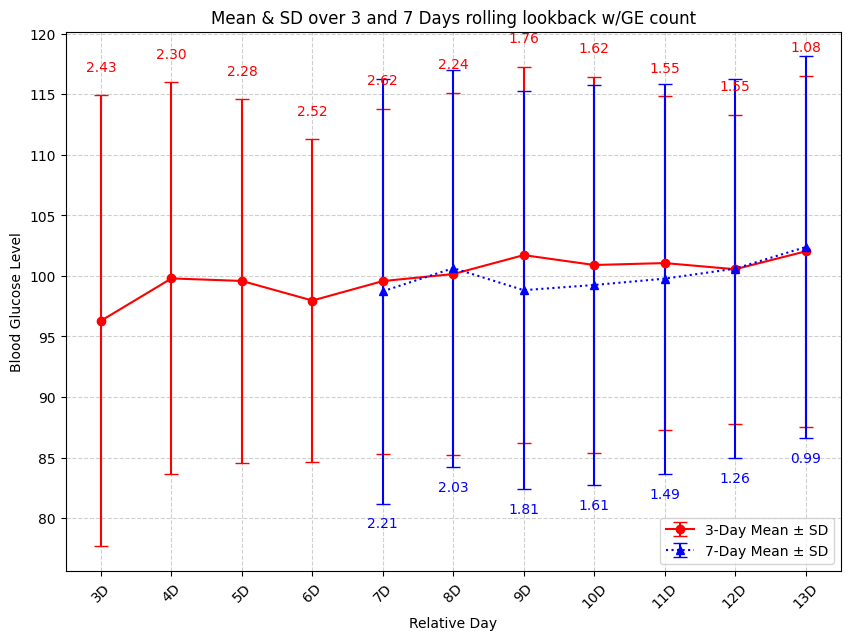

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Plot function
def plot_blood_glucose(comparison_df):
    # Normalize column names (strip spaces, convert to lowercase)
    comparison_df.columns = [col.strip() for col in comparison_df.columns]
    
    # Extract relevant data
    x_labels = comparison_df["Relative_Day"]
    x_values = np.arange(len(x_labels))
    
    # Map correct column names based on available data
    mean_3D = comparison_df["3D_Mean"]
    std_3D = comparison_df["3D_Std"]
    avg_total_3D = comparison_df["3D_Avg_Total_GE"]  # No explicit '3D_Avg_Total_GE', using '3D_Total' instead
    
    mean_7D = comparison_df["7D_Mean"]
    std_7D = comparison_df["7D_Std"]
    avg_total_7D = comparison_df["7D_Avg_Total_GE"]  # No explicit '7D_Avg_Total_GE', using '7D_Total' instead
    
    # Plot setup
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Plot 3-Day Mean and SD
    ax.errorbar(x_values, mean_3D, yerr=std_3D, fmt='o-', label='3-Day Mean ± SD', capsize=5, color='red')
    
    # Plot 7-Day Mean and SD
    ax.errorbar(x_values, mean_7D, yerr=std_7D, fmt='^-', linestyle='dotted', label='7-Day Mean ± SD', capsize=5, color='blue')
    
    # Annotate Avg_Total_GE values
    for i in range(len(x_values)):
        if not np.isnan(avg_total_3D[i]):
            ax.text(x_values[i], mean_3D[i] + std_3D[i] + 2, f"{avg_total_3D[i]:.2f}", ha='center', fontsize=10, color='red')
        if not np.isnan(avg_total_7D[i]):
            ax.text(x_values[i], mean_7D[i] - std_7D[i] - 2, f"{avg_total_7D[i]:.2f}", ha='center', fontsize=10, color='blue')
    
    # Labels and formatting
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_labels, rotation=45)
    ax.set_xlabel("Relative Day")
    ax.set_ylabel("Blood Glucose Level")
    ax.set_title("Mean & SD over 3 and 7 Days rolling lookback w/GE count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Show plot
    plt.show()

# Example Usage
print("Columns in DataFrame:", comparison_df.columns)  # Debugging step
plot_blood_glucose(comparison_df)


# Visualzation Random participents on day 8

In [94]:
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day,Rolling_3D_Mean,Rolling_3D_Std,3D_Threshold,3D_GE_Binary,3D_Total,Rolling_7D_Mean,Rolling_7D_Std,7D_Threshold,7D_GE_Binary,7D_Total
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
1,1,2022-10-06 01:49:00,76,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
2,1,2022-10-06 02:04:00,78,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
3,1,2022-10-06 02:19:00,75,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
4,1,2022-10-06 02:34:00,75,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,89,2023-05-09 19:08:00,114,13,98.666667,24.193663,134.957161,0,2,95.571429,17.859238,122.360286,0,5
1244,89,2023-05-09 19:23:00,136,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5
1245,89,2023-05-09 19:38:00,142,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5
1246,89,2023-05-09 19:53:00,137,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5


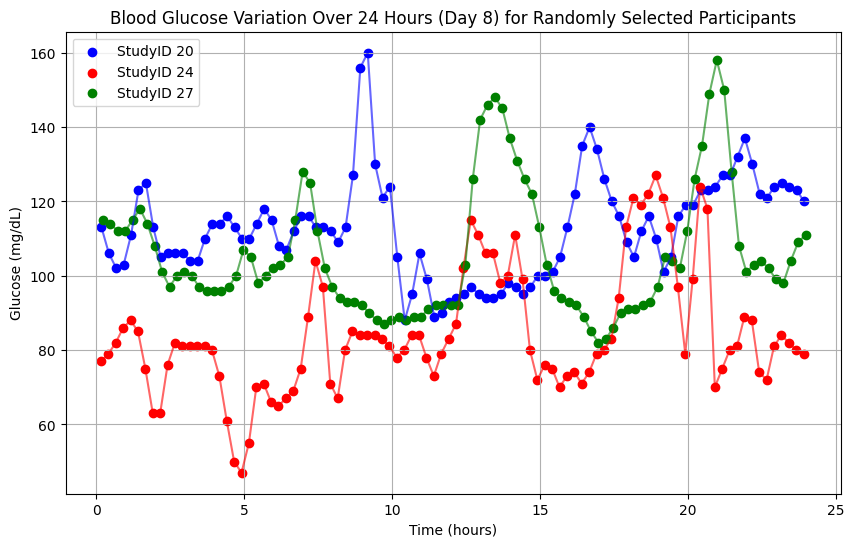

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Filter data for day 8
day_8_data = df[df["Relative_Day"] == 8]

# Randomly select 3 unique StudyIDs
random_study_ids = np.random.choice(day_8_data["StudyID"].unique(), 3, replace=False)

# Filter data for the selected StudyIDs
filtered_data_day8 = day_8_data[day_8_data["StudyID"].isin(random_study_ids)].copy()

# Convert Timestamp to datetime format
filtered_data_day8["Timestamp"] = pd.to_datetime(filtered_data_day8["Timestamp"])

# Normalize time to 0-24 hours for visualization
filtered_data_day8["Hours"] = (filtered_data_day8["Timestamp"] - filtered_data_day8["Timestamp"].dt.floor('D')).dt.total_seconds() / 3600

# Define colors and markers for the participants
colors = ['blue', 'red', 'green']
markers = ['o', 'o', 'o']  # Circle markers

# Plot glucose variation over 24 hours for each selected participant
plt.figure(figsize=(10, 6))

for i, study_id in enumerate(random_study_ids):
    subset = filtered_data_day8[filtered_data_day8["StudyID"] == study_id].copy()
    
    # Sort by time for proper connection of lines
    subset = subset.sort_values(by="Hours")
    
    # Plot scatter points
    plt.scatter(subset["Hours"], subset["Glucose mg/dL"], color=colors[i], marker=markers[i], label=f"StudyID {study_id}")
    
    # Plot line connecting points (except first and last)
    plt.plot(subset["Hours"], subset["Glucose mg/dL"], color=colors[i], linestyle='-', alpha=0.6)

plt.xlabel("Time (hours)")
plt.ylabel("Glucose (mg/dL)")
plt.title("Blood Glucose Variation Over 24 Hours (Day 8) for Randomly Selected Participants")
plt.legend()
plt.grid(True)
plt.show()


# Adding GE event

In [124]:
import pandas as pd


# Specify the file path for the .xlsl file
df = pd.read_excel('/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/3d_7d_totals.xlsx', engine='openpyxl')  # 파일 경로 지정


# Display the dataframe
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day,Rolling_3D_Mean,Rolling_3D_Std,3D_Threshold,3D_GE_Binary,3D_Total,Rolling_7D_Mean,Rolling_7D_Std,7D_Threshold,7D_GE_Binary,7D_Total
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
1,1,2022-10-06 01:49:00,76,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
2,1,2022-10-06 02:04:00,78,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
3,1,2022-10-06 02:19:00,75,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
4,1,2022-10-06 02:34:00,75,1,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13,98.666667,24.193663,134.957161,0,2,95.571429,17.859238,122.360286,0,5
71713,89,2023-05-09 19:23:00,136,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5
71714,89,2023-05-09 19:38:00,142,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5
71715,89,2023-05-09 19:53:00,137,13,98.666667,24.193663,134.957161,1,2,95.571429,17.859238,122.360286,1,5


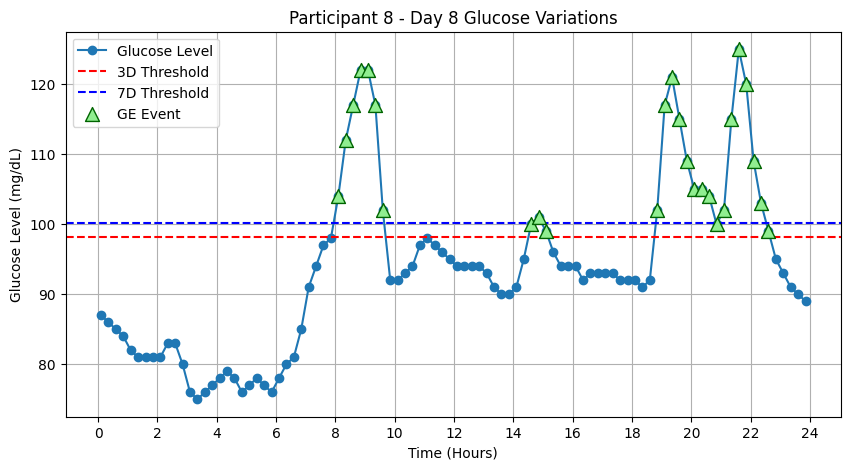

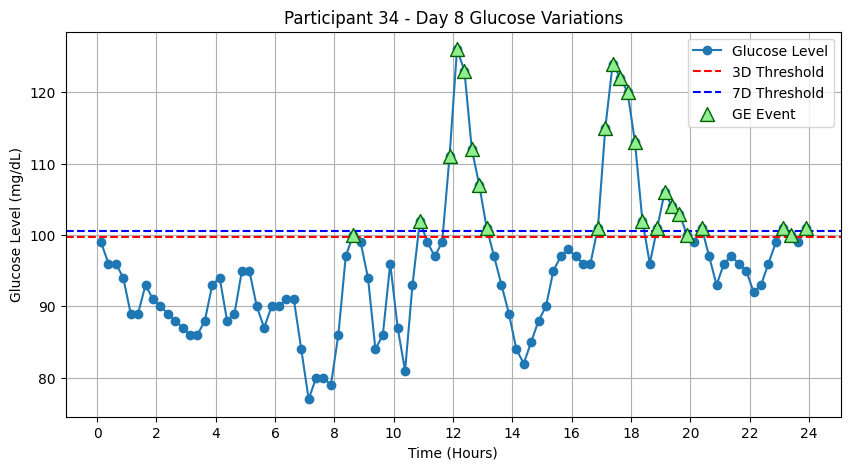

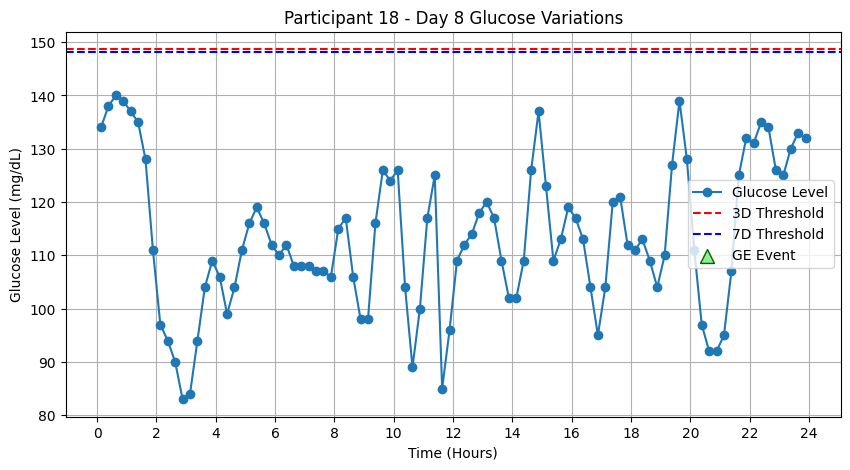

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Filter data for day 8
day8_data = df[df['Relative_Day'] == 8]

# Select 3 random participants
random_participants = np.random.choice(day8_data['StudyID'].unique(), 3, replace=False)

# Plot data for each participant separately
for participant in random_participants:
    participant_data = day8_data[day8_data['StudyID'] == participant].copy()
    
    # Convert Timestamp to hours (0-24 scale)
    participant_data['Hour'] = pd.to_datetime(participant_data['Timestamp']).dt.hour + \
                               pd.to_datetime(participant_data['Timestamp']).dt.minute / 60

    # Sort data by time
    participant_data = participant_data.sort_values(by='Hour')

    # Plot glucose levels
    plt.figure(figsize=(10, 5))
    plt.plot(participant_data['Hour'], participant_data['Glucose mg/dL'], label='Glucose Level', marker='o', linestyle='-')

    # Plot 3D and 7D threshold lines
    plt.axhline(y=participant_data['3D_Threshold'].iloc[0], color='r', linestyle='dashed', label='3D Threshold')
    plt.axhline(y=participant_data['7D_Threshold'].iloc[0], color='b', linestyle='dashed', label='7D Threshold')

    # Mark GE points (where threshold is exceeded)
    ge_points = participant_data[(participant_data['3D_GE_Binary'] == 1) | (participant_data['7D_GE_Binary'] == 1)]
    plt.scatter(ge_points['Hour'], ge_points['Glucose mg/dL'], color='lightgreen', edgecolors='darkgreen', marker='^', s=100, label='GE Event', zorder=3)

    # Formatting the plot
    plt.xlabel('Time (Hours)')
    plt.ylabel('Glucose Level (mg/dL)')
    plt.title(f'Participant {participant} - Day 8 Glucose Variations')
    plt.xticks(np.arange(0, 25, 2))
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


# Add the Previous 10 Data Points to the Dataset

In [110]:
import pandas as pd


# Specify the file path for the .xlsl file
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/4.New_CGM/Datas/0206_CGM.xlsx', engine='openpyxl')  # 파일 경로 지정


# Display the dataframe
df

,StudyID,Timestamp,Glucose mg/dL,Relative_Day
0,1,2022-10-06 01:34:00,78,1
1,1,2022-10-06 01:49:00,76,1
2,1,2022-10-06 02:04:00,78,1
3,1,2022-10-06 02:19:00,75,1
4,1,2022-10-06 02:34:00,75,1
...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13
71713,89,2023-05-09 19:23:00,136,13
71714,89,2023-05-09 19:38:00,142,13
71715,89,2023-05-09 19:53:00,137,13


In [111]:
import pandas as pd

# Add previous 10 timestamp and glucose values
def add_previous_values(df, num_previous=10):
    df = df.copy()
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values(by='Timestamp').reset_index(drop=True)
    
    for i in range(1, num_previous + 1):
        df[f'previous_{i}_time'] = df['Timestamp'].shift(i)
        df[f'previous_{i}_glucose'] = df['Glucose mg/dL'].shift(i)
    
    return df

# Apply the function to existing dataframe
df_updated = add_previous_values(df)

# Display result

df_updated

,StudyID,Timestamp,Glucose mg/dL,Relative_Day,previous_1_time,previous_1_glucose,previous_2_time,previous_2_glucose,previous_3_time,previous_3_glucose,...,previous_6_time,previous_6_glucose,previous_7_time,previous_7_glucose,previous_8_time,previous_8_glucose,previous_9_time,previous_9_glucose,previous_10_time,previous_10_glucose
0,1,2022-10-06 01:34:00,78,1,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,1,2022-10-06 01:49:00,76,1,2022-10-06 01:34:00,78.0,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,1,2022-10-06 02:04:00,78,1,2022-10-06 01:49:00,76.0,2022-10-06 01:34:00,78.0,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,1,2022-10-06 02:19:00,75,1,2022-10-06 02:04:00,78.0,2022-10-06 01:49:00,76.0,2022-10-06 01:34:00,78.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,1,2022-10-06 02:34:00,75,1,2022-10-06 02:19:00,75.0,2022-10-06 02:04:00,78.0,2022-10-06 01:49:00,76.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,13,2023-05-09 18:53:00,86.0,2023-05-09 18:38:00,71.0,2023-05-09 18:23:00,71.0,...,2023-05-09 17:38:00,78.0,2023-05-09 17:23:00,83.0,2023-05-09 17:08:00,84.0,2023-05-09 16:53:00,82.0,2023-05-09 16:38:00,85.0
71713,89,2023-05-09 19:23:00,136,13,2023-05-09 19:08:00,114.0,2023-05-09 18:53:00,86.0,2023-05-09 18:38:00,71.0,...,2023-05-09 17:53:00,76.0,2023-05-09 17:38:00,78.0,2023-05-09 17:23:00,83.0,2023-05-09 17:08:00,84.0,2023-05-09 16:53:00,82.0
71714,89,2023-05-09 19:38:00,142,13,2023-05-09 19:23:00,136.0,2023-05-09 19:08:00,114.0,2023-05-09 18:53:00,86.0,...,2023-05-09 18:08:00,74.0,2023-05-09 17:53:00,76.0,2023-05-09 17:38:00,78.0,2023-05-09 17:23:00,83.0,2023-05-09 17:08:00,84.0
71715,89,2023-05-09 19:53:00,137,13,2023-05-09 19:38:00,142.0,2023-05-09 19:23:00,136.0,2023-05-09 19:08:00,114.0,...,2023-05-09 18:23:00,71.0,2023-05-09 18:08:00,74.0,2023-05-09 17:53:00,76.0,2023-05-09 17:38:00,78.0,2023-05-09 17:23:00,83.0


In [112]:

# Save the updated dataframe to an Excel file
output_file = "Pre_10_CGM_data.xlsx"
df_updated.to_excel(output_file, index=False)